In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)
print(X[1])

(70000, 784) (70000,)


KeyError: 1

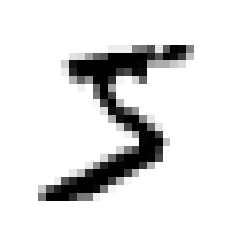

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [26]:
y[0]

'5'

In [31]:
import numpy as np
y = y.astype(np.uint8)

In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf

SGDClassifier(random_state=42)

In [36]:
sgd_clf.predict([some_digit])

array([ True])

#Implementing CV
#필요하면 이렇게 구현할 수 있다~2마리야
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_trian_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_prediction = clone_clf.predict(X_test_fold)
    n_correct = sum(y_prediction == y_test_fold)
    print(n_correct/len(y_pred))

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv= 3, scoring = 'accuracy')

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [52]:
from sklearn.metrics import precision_score, recall_score
print(
precision_score(y_train_5, y_train_pred),
recall_score(y_train_5, y_train_pred))

0.8370879772350012 0.6511713705958311


In [53]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [54]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [56]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 

array([ True])

In [59]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

In [60]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [65]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

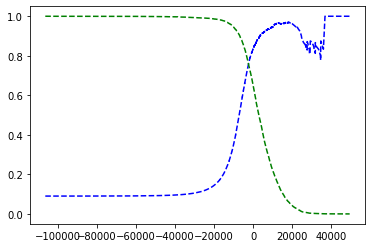

In [66]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [68]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [69]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [70]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [71]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706